# Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#Logistic Regression
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
file_url = 'https://raw.githubusercontent.com/bs-cse-iitb/FML_Project/main/diabetes_full.csv'
dataset = pd.read_csv(file_url)

# Exploratory Data Analysis 

The dataset has 20 Features columns and 1 Target column with 253680 records in total.

"Diabetes_012" column Represents the target variable 

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Checking for Missing Values

We can see that their are no null values in the dataeset

In [ ]:
dataset.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Checking the frequency of target variable classes 

Here class 0 represent No Diabetes, class 1 reperesent Pre Diabetes 
and class 2 represent Diabetes 

We can see that the data is skewed and hence we are combinining class 1 and 2 into a single class 1 (representing Diabetes)

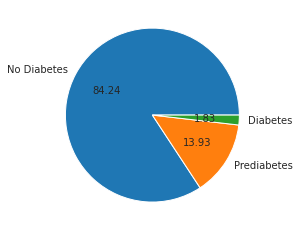

In [ ]:
class_index = list(dataset.Diabetes_012.value_counts().index)
class_frequency = list(dataset.Diabetes_012.value_counts().values)

sns.set_style('darkgrid')
plt.pie(dataset.Diabetes_012.value_counts(),labels=["No Diabetes","Prediabetes","Diabetes"],autopct='%.2f')
plt.savefig('target_012_pie.png',bbox_inches="tight")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


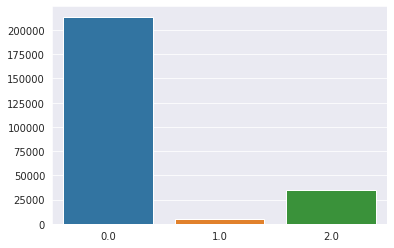

In [ ]:
sns.barplot(class_index,class_frequency)
plt.savefig('target_012_barplot.png',bbox_inches='tight')

In [ ]:
#Combining class 1 and 2 into a single class 1 

dataset['Diabetes_012'] = np.where(dataset['Diabetes_012'] == 0.0,0.0,1.0)
dataset.Diabetes_012.value_counts()
dataset.rename(columns={'Diabetes_012':'Diabetes_binary'},inplace=True)
print(dataset.Diabetes_binary.value_counts())

0.0    213703
1.0     39977
Name: Diabetes_binary, dtype: int64


## Plotting the Correlation of every pair of columns

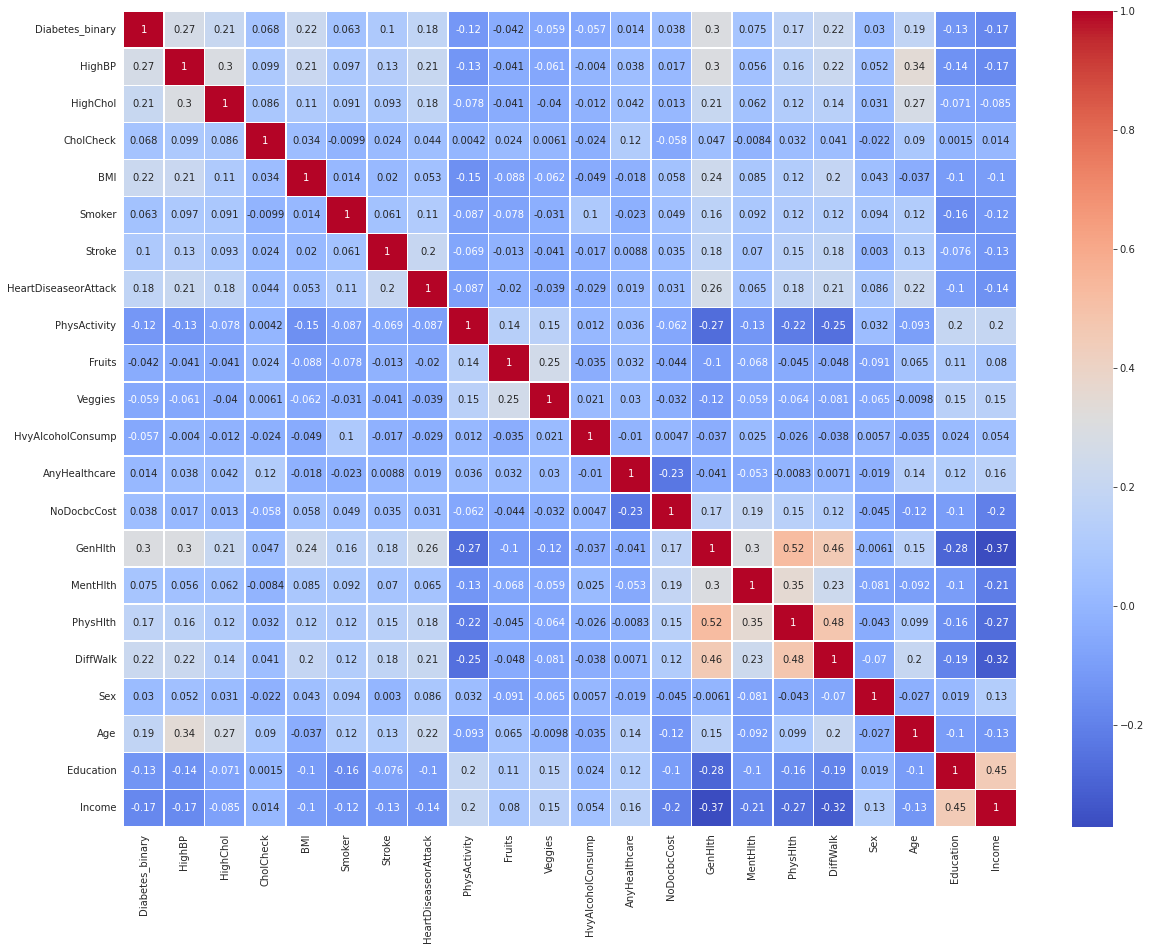

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(dataset.corr(),annot=True,linewidths=0.5,cmap='coolwarm')


## Plotting the Correlation of features against target column

 Fruits, Veggies, AnyHealthcare, NoDocbcCost,Sex have the lowest correlation with the target variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


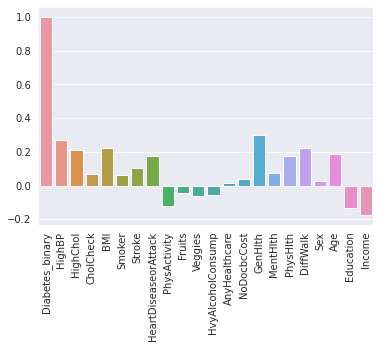

<Figure size 432x288 with 0 Axes>

In [ ]:
corr = dataset.corr()
graph = sns.barplot(corr.Diabetes_binary.index,corr.Diabetes_binary.values)
graph.set_xticklabels(labels=corr.Diabetes_binary.index, rotation=90)

plt.show()

plt.savefig("target_corr_bar.png",bbox_inches='tight')

Dropping the columns with lowest correlation

In [ ]:
variables_to_drop = ['Fruits','Veggies','AnyHealthcare','NoDocbcCost','Sex']
dataset.drop(variables_to_drop,axis=1,inplace=True)


# Logistic Regression


## Preprocessing

In [ ]:
data = dataset.drop_duplicates()

In [ ]:
y = data.Diabetes_binary
X = data.drop('Diabetes_binary',axis = 1)

In [ ]:
#One Hot Encoding 
continous_var_list = []
categorical_var  = []
for var in X.columns:
  if var not in continous_var_list:
    categorical_var.append(var)

X = pd.get_dummies(X,columns=categorical_var)

In [ ]:
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour,TomekLinks,EditedNearestNeighbours

# nm = TomekLinks() # 0.835876 - 15min
# nm = EditedNearestNeighbours(n_neighbors=3) # 0.851282 - 12min (n=3)
# nm = NearMiss(version = 1 , n_neighbors = 20) #0.856585 - 5min (n=20) // 0.853439 when 1-Hot done after undersampling
# nm = NearMiss(version = 1 , n_neighbors = 10) #0.856900 - 4min (n=10) // 0.849852 when 1-Hot done after undersampling
# nm = NearMiss(version = 1 , n_neighbors = 5) #0.844755 - 3min (n=5)

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
nm = SMOTE() # 0.872103 - 48sec
# nm = ADASYN() # 0.869746

x_sm,y_sm= nm.fit_resample(X,y)
X,y=x_sm,y_sm 

print(X.shape)

(335242, 196)


## Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)

##Trying Different Scaling Methods

In [ ]:
from sklearn.preprocessing import MaxAbsScaler,StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer,QuantileTransformer
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

## Grid Seach Implementation for logistic Regression

In [ ]:
best_model = None
inv_regularization_constant = None
l1_ratio = None 
max_accuracy = 0.0
for i in np.arange(0.1,1.1,0.2):
  for j in np.arange(0.1,1.1,0.2):

    logisticRegressionModel = LogisticRegression(max_iter = 1000, solver='saga', penalty='elasticnet', C=i, l1_ratio=j, tol=1e-3, warm_start=True)
    logisticRegressionModel.fit(X_train, y_train)
    y_pred = logisticRegressionModel.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred)
    if(current_accuracy > max_accuracy):
      best_model = logisticRegressionModel
      max_accuracy = current_accuracy
      l1_ratio = j
      inv_regularization_constant  = i

print("Logistic Regression Test Maximum Accuracy = "+ str(max_accuracy) + " , obtained for Inverse Regularization Constant = "+str(inv_regularization_constant) + " and L1 Regularization Ratio = "+str(l1_ratio))

logisticRegressionModel = best_model

Logistic Regression Test Maximum Accuracy = 0.8726901221494727 , obtained for Inverse Regularization Constant = 0.9000000000000001 and L1 Regularization Ratio = 0.9000000000000001


## Evaluating Model Performance

In [ ]:
Y_pred = logisticRegressionModel.predict(X_test)
Y_val = logisticRegressionModel.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

print("~~~~~~~  TRAIN ACCURACY  ~~~~~~~")
print(classification_report(y_train, Y_val, digits=6))

print("~~~~~~~  TEST ACCURACY  ~~~~~~~")
print(classification_report(y_test, Y_pred, digits=6))

~~~~~~~  TRAIN ACCURACY  ~~~~~~~
              precision    recall  f1-score   support

         0.0   0.795659  0.999993  0.886200    134009
         1.0   0.999990  0.743516  0.852889    134184

    accuracy                       0.871671    268193
   macro avg   0.897824  0.871754  0.869544    268193
weighted avg   0.897891  0.871671  0.869534    268193

~~~~~~~  TEST ACCURACY  ~~~~~~~
              precision    recall  f1-score   support

         0.0   0.797476  1.000000  0.887328     33612
         1.0   1.000000  0.744714  0.853680     33437

    accuracy                       0.872690     67049
   macro avg   0.898738  0.872357  0.870504     67049
weighted avg   0.898473  0.872690  0.870548     67049



# Naive Bayes

## Preprocessing

Since Naive Bayes has an assumption that features are conditionally independent hence removing the columns which have high correlation with each other

In [ ]:
df = dataset

In [ ]:
#Identifying the columns with high correlation among each other

cor_matrix=df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
[column for column in upper_tri.columns if any(upper_tri[column] > 0.32)]

['PhysHlth', 'DiffWalk', 'Age', 'Income']

In [ ]:
#Columns with high correlation
df.drop(['PhysHlth', 'Income', 'DiffWalk', 'MentHlth'],axis=1,inplace=True)

In [ ]:
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

X = np.asarray(X)
y = np.asarray(y)

## Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Scaling the data using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

## Evaluating Model Performance

In [ ]:
y_val = gnb.predict(X_train)
y_pred = gnb.predict(X_test)

print("~~~~~~~  TRAIN ACCURACY  ~~~~~~~")
print(classification_report(y_train, y_val, digits=6))

print("~~~~~~~  TEST ACCURACY  ~~~~~~~")
print(classification_report(y_test, y_pred, digits=6))

~~~~~~~  TRAIN ACCURACY  ~~~~~~~
              precision    recall  f1-score   support

         0.0   0.911229  0.823398  0.865090    149523
         1.0   0.378170  0.572452  0.455458     28053

    accuracy                       0.783755    177576
   macro avg   0.644699  0.697925  0.660274    177576
weighted avg   0.827017  0.783755  0.800377    177576

~~~~~~~  TEST ACCURACY  ~~~~~~~
              precision    recall  f1-score   support

         0.0   0.910625  0.822343  0.864236     64180
         1.0   0.371652  0.565582  0.448553     11924

    accuracy                       0.782114     76104
   macro avg   0.641139  0.693963  0.656394     76104
weighted avg   0.826179  0.782114  0.799106     76104



#Neural Network

## Preprocessing

In [ ]:
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour,TomekLinks,EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

y = data.Diabetes_binary
X = data.drop('Diabetes_binary',axis = 1)

X = np.asarray(X)
y = np.asarray(y)

# nm = TomekLinks() # accuracy: 0.8358 - 10min
# nm = EditedNearestNeighbours(n_neighbors=3) # accuracy: 0.8560 - 13min (n=3)
nm = NearMiss(version = 1 , n_neighbors = 20) #accuracy: 0.8626 - 5min (n=20) 
# nm = NearMiss(version = 1 , n_neighbors = 10) #accuracy: 0.8559 - 4min (n=10) 
# # nm = NearMiss(version = 1 , n_neighbors = 5) #0.844755 - 3min (n=5)

# from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
# nm = SMOTE() # accuracy: 0.8314
# nm = ADASYN() # accuracy: 0.8213

x_sm,y_sm= nm.fit_resample(X,y)
X,y=x_sm,y_sm 


## Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)

## Scaling the data using Robust Scaler

In [ ]:
from sklearn.preprocessing import MaxAbsScaler,StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer,QuantileTransformer

scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

# minmax - accuracy: 0.8537
# maxabs - accuracy: 0.8499
# standard - accuracy: 0.8634
# robust - accuracy: 0.8658
# power - accuracy: 0.8643
# quantile - accuracy: 0.8520

## Training Neural NetWork Classifier

In [ ]:
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import keras.layers as layers
import keras

# Grid Search NN
max_accuracy = 0.0
best_model = None
learning_rate = None
batch_size = None
epochs = None

for i in {0.001,0.0001}:
  for j in {64,32}:
    for k in {30}:
      
      model = Sequential()
      model.add(layers.InputLayer((X_train.shape[1],)))
      model.add(Dense(32,activation='relu'))
      model.add(Dense(64,activation='relu'))
      model.add(Dense(1,activation='sigmoid'))

      optimizer = keras.optimizers.Adam(learning_rate = i)
      model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
      history = model.fit(X_train,y_train,batch_size=j,epochs=k,validation_split=0.2)
      p_pred = model.predict(X_test)
      p_pred = p_pred.flatten()

      # extract the predicted class labels
      y_pred = np.where(p_pred > 0.5, 1, 0)
      
      current_accuracy = accuracy_score(y_test,y_pred)
      if(current_accuracy > max_accuracy):
        best_model = model
        max_accuracy = current_accuracy
        learning_rate = i
        batch_size = j
        epochs = k

print("Neural Network Test Maximum Accuracy = "+ str(max_accuracy) + " , obtained for Learning Rate = "+str(learning_rate) + " and batch size = "+str(batch_size) + " and epochs = " + str(epochs))


neuralNetworkModel = best_model

Epoch 1/30
795/795 [==============================] - 3s 2ms/step - loss: 0.3570 - accuracy: 0.8422 - val_loss: 0.3319 - val_accuracy: 0.8575
Epoch 2/30
795/795 [==============================] - 2s 2ms/step - loss: 0.3285 - accuracy: 0.8573 - val_loss: 0.3245 - val_accuracy: 0.8639
Epoch 3/30
795/795 [==============================] - 2s 2ms/step - loss: 0.3188 - accuracy: 0.8626 - val_loss: 0.3181 - val_accuracy: 0.8642
Epoch 4/30
795/795 [==============================] - 2s 2ms/step - loss: 0.3130 - accuracy: 0.8658 - val_loss: 0.3091 - val_accuracy: 0.8668
Epoch 5/30
795/795 [==============================] - 2s 2ms/step - loss: 0.3076 - accuracy: 0.8681 - val_loss: 0.3089 - val_accuracy: 0.8654
Epoch 6/30
795/795 [==============================] - 2s 2ms/step - loss: 0.3040 - accuracy: 0.8702 - val_loss: 0.3057 - val_accuracy: 0.8688
Epoch 7/30
795/795 [==============================] - 2s 2ms/step - loss: 0.3018 - accuracy: 0.8701 - val_loss: 0.3048 - val_accuracy: 0.8664
Epoch 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

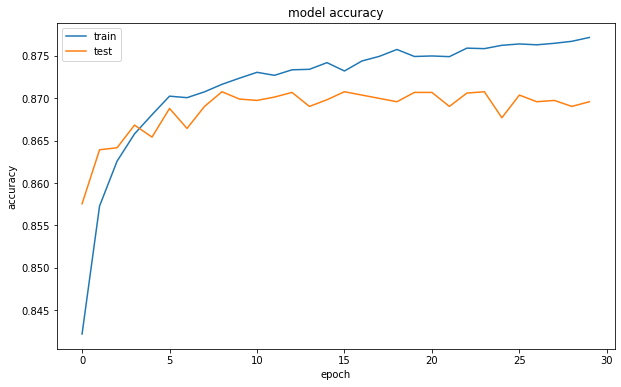

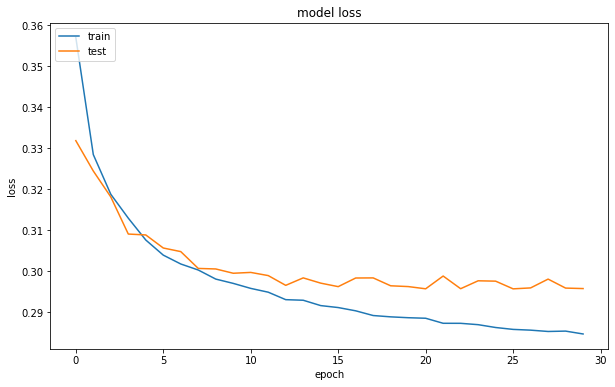

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
from google.colab import files
plt.savefig("nn1.pdf", bbox_inches = 'tight')
files.download("nn1.pdf")

fig = plt.figure(figsize=(10, 6))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

from google.colab import files
plt.savefig("nn2.pdf", bbox_inches = 'tight')
files.download("nn2.pdf")

## Evaluting Model Performance

In [ ]:
y_val = neuralNetworkModel.predict(X_train)

# extract the predicted class labels
y_val = np.where(y_val > 0.5, 1, 0)
y_pred = neuralNetworkModel.predict(X_test)

y_pred = y_pred.flatten()

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)

print("~~~~~~~  TRAIN ACCURACY  ~~~~~~~")
print(classification_report(y_train, y_val, digits=6))

print("~~~~~~~  TEST ACCURACY  ~~~~~~~")
print(classification_report(y_test, y_pred, digits=6))

~~~  TRAIN ACCURACY  ~~~
              precision    recall  f1-score   support

         0.0   0.820580  0.966390  0.887536     31836
         1.0   0.958954  0.787959  0.865087     31725

    accuracy                       0.877330     63561
   macro avg   0.889767  0.877175  0.876312     63561
weighted avg   0.889646  0.877330  0.876331     63561

~~~  TEST ACCURACY  ~~~
              precision    recall  f1-score   support

         0.0   0.811698  0.962104  0.880524      7890
         1.0   0.954274  0.779903  0.858322      8001

    accuracy                       0.870367     15891
   macro avg   0.882986  0.871003  0.869423     15891
weighted avg   0.883484  0.870367  0.869346     15891



# Decision Trees

## Preprocessing

In [ ]:
y = data.Diabetes_binary
X = data.drop('Diabetes_binary',axis = 1)

#One Hot Encoding of categorical data
continous_var_list = ['BMI','MentHlth','PhysHlth']

categorical_var  = []
for var in X.columns:
  if var not in continous_var_list:
    categorical_var.append(var)
print(categorical_var)
X = pd.get_dummies(X,columns=categorical_var)

#Undersampling to remove the skew of that dataset
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

# from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
# # nm = SMOTE()  # 0.872103
# nm = ADASYN()

x_sm,y_sm= nm.fit_resample(X,y)
X = x_sm
y = y_sm

['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Education', 'Income']


##Scaling the data using MinMax Scaler

In [ ]:
X = np.asarray(X)
y = np.asarray(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.7)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

##Training Decision Trees Classifier

In [ ]:
from sklearn import tree

def deci(x_train, y_train, x_test, y_test, sample_weight=None, dep=1):
  finalModel = None
  maxAcc = 0
  no_of_features = x_train.shape[1]
  for depth in range(1,int(no_of_features*dep),1):
    model = tree.DecisionTreeClassifier(max_depth=depth, criterion="gini")
    if sample_weight == None:
      model.fit(x_train, y_train)
    else:
      model.fit(x_train, y_train, sample_weight=sample_weight)
    scoreTrain = model.score(x_train,y_train)
    scoreTest = model.score(x_test, y_test)
    if(scoreTrain - scoreTest <= 0.02 and scoreTrain>maxAcc):
      finalModel = model
      maxAcc = scoreTrain
  return finalModel

In [ ]:
decision_model = deci(X_train, y_train, X_test, y_test)

## Evaluating Model Performance

In [ ]:
y_val = decision_model.predict(X_train)
y_pred = decision_model.predict(X_test)

print("~~~~~~~  TRAIN ACCURACY  ~~~~~~~")
print(classification_report(y_train, y_val, digits=6))

print("~~~~~~~  TEST ACCURACY  ~~~~~~~")
print(classification_report(y_test, y_pred, digits=6))

~~~~~~~  TRAIN ACCURACY  ~~~~~~~
              precision    recall  f1-score   support

         0.0   0.771801  0.975470  0.861766     27110
         1.0   0.966863  0.712769  0.820596     27222

    accuracy                       0.843849     54332
   macro avg   0.869332  0.844120  0.841181     54332
weighted avg   0.869533  0.843849  0.841139     54332

~~~~~~~  TEST ACCURACY  ~~~~~~~
              precision    recall  f1-score   support

         0.0   0.761753  0.959826  0.849395     11699
         1.0   0.944997  0.696902  0.802205     11587

    accuracy                       0.828996     23286
   macro avg   0.853375  0.828364  0.825800     23286
weighted avg   0.852934  0.828996  0.825914     23286



# Random Forest

##Preprocessing

In [ ]:
y = data.Diabetes_binary
X = data.drop('Diabetes_binary',axis = 1)

continous_var_list = ['BMI','MentHlth','PhysHlth']

categorical_var  = []
for var in X.columns:
  if var not in continous_var_list:
    categorical_var.append(var)
print(categorical_var)
X = pd.get_dummies(X,columns=categorical_var)

from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

# from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
# # nm = SMOTE()  # 0.872103
# nm = ADASYN()

x_sm,y_sm= nm.fit_resample(X,y)
X = x_sm
y = y_sm

['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Age', 'Education', 'Income']


## Scaling the data with MinMax Scaler

In [ ]:
X = np.asarray(X)
y = np.asarray(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.7)

# scaler = MaxAbsScaler().fit(X_train)
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

## Training Random Forest Classifier

In [ ]:
def deci(x_train, y_train, x_test, y_test, sample_weight=None, dep=1):
  finalModel = None
  maxAcc = 0
  no_of_features = x_train.shape[1]
  for depth in range(1,int(no_of_features*dep),1):
    model = tree.DecisionTreeClassifier(max_depth=depth, criterion="gini")
    if sample_weight == None:
      model.fit(x_train, y_train)
    else:
      model.fit(x_train, y_train, sample_weight=sample_weight)
    scoreTrain = model.score(x_train,y_train)
    scoreTest = model.score(x_test, y_test)
    if(scoreTrain - scoreTest <= 0.02 and scoreTrain>maxAcc):
      finalModel = model
      maxAcc = scoreTrain
  return finalModel

In [ ]:
def givePredict(x, aggModels, featureDel):
  predictedY = 0

  for j in range(len(aggModels)):
    model=aggModels[j]
    new_x = np.delete(x, featureDel[j], 1)
    p = int(model.predict(new_x)[0])
    if p==0:
        p=-1
    predictedY+=p
  if(predictedY>=0):
    return 1
  else:
    return 0

In [ ]:
def randomForestPredict(x,aggModels,featureDel):
  predictions = list()
  for i in range(len(x)):
    inpA = np.array([x[i]])
    predictedY = 0
    
    predictedY = givePredict(inpA, aggModels, featureDel)
    
    predictions.append(predictedY)

  return predictions

In [ ]:
def randomForest(X_train, y_train, X_test, y_test, no_of_trees=50):
  import random
  x,y = X_train, y_train
  aggModels = list()
  featureDel = list()
  for i in range(no_of_trees):
    n = len(x)
    newX, newY = list(), list()
    
    for j in range(n):
      index = random.randint(0,n-1)
      newX.append(x[index])
      newY.append(y[index])
    newX, newY = np.array(newX), np.array(newY)

    cols = newX.shape[1]
    d = random.randint(1,10)*0.1
    todel = random.sample(range(0, cols-1), int(cols*(1-d)))
    newX = np.delete(newX, todel, 1)

    newXtrain, newXtest, newYtrain, newYtest = train_test_split(newX,newY,random_state=42,train_size=0.8)
    sample_weight = [1/len(newXtrain) for i in range(len(newXtrain))]
    m = deci(newXtrain, newYtrain, newXtest, newYtest, sample_weight, 0.2)
    if m is not None:
      aggModels.append(m)
      featureDel.append(todel)

  return aggModels, featureDel

In [ ]:
aggModels, featureDel = randomForest(X_train, y_train, X_test, y_test, 100)

## Evaluating Model Performance

In [ ]:
from sklearn.metrics import classification_report
y_val = randomForestPredict(X_train,aggModels,featureDel)
y_pred = randomForestPredict(X_test,aggModels,featureDel)

print("~~~  TRAIN ACCURACY  ~~~")
print(classification_report(y_train, y_val, digits=6))

print("~~~  TEST ACCURACY  ~~~")
print(classification_report(y_test, y_pred, digits=6))

~~~  TRAIN ACCURACY  ~~~
              precision    recall  f1-score   support

         0.0   0.769459  0.971795  0.858871     27761
         1.0   0.961907  0.709819  0.816856     27855

    accuracy                       0.840585     55616
   macro avg   0.865683  0.840807  0.837864     55616
weighted avg   0.865846  0.840585  0.837828     55616

~~~  TEST ACCURACY  ~~~
              precision    recall  f1-score   support

         0.0   0.767059  0.969578  0.856510     11965
         1.0   0.958219  0.703226  0.811155     11871

    accuracy                       0.836927     23836
   macro avg   0.862639  0.836402  0.833832     23836
weighted avg   0.862262  0.836927  0.833922     23836



#Support Vector Machines

## Preprocessing

In [ ]:
Y = data['Diabetes_binary']
X = data.drop(columns=['Diabetes_binary'])

# step one hot coding

#for FIRST data set
#continous_var_list = ['age', 'BMI' 'trestbps','chol','thalach'	'oldpeak']
continous_var_list = ['BMI','MentHlth','PhysHlth', 'Age']
categorical_var  = []
for var in X.columns:
  if var not in continous_var_list:
    categorical_var.append(var)


print(categorical_var)
X = pd.get_dummies(X,columns=categorical_var)

abs_scaler = MaxAbsScaler()
abs_scaler.fit(X)
scaled_data = abs_scaler.transform(X)
df_scaled = pd.DataFrame(scaled_data, columns = X.columns)

from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1, n_neighbors=10)
X_sm, Y_sm = nm.fit_resample(X,Y)
X,Y = X_sm, Y_sm

['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Education', 'Income']


## Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.80)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



## Training SVM Classifier

In [ ]:
def SVM(X_train, Y_train, X_test, Y_test, kernel = 'rbf', type = 2):

  if type==1:
    parameters = {}
    #Linear
    if kernel=='linear':
      #parameters = {'C':[0.3, 0.6, 0.9, 3, 6, 9, 48, 99]}
      parameters = {'C':[0.1, 0.5, 1, 5, 10, 50, 100]}
      svc = SVC(kernel = 'linear')
    #Polynomial
    elif kernel=='poly':
      parameters = {'C':[0.1, 1, 3], 'degree':[2, 3, 4], 'gamma': [0.1, 1]}
      svc = SVC(kernel = 'poly')
    #RBF
    elif kernel=='rbf':
      parameters = {'C':[0.1, 0.5, 1, 5, 10, 50, 100], 'gamma': [0.1, 0.5, 1, 3, 6, 9]}
      # other c value [0.1,0.3,1, 0.6, 0.9, 3, 6, 9, 48, 99]
      svc = SVC(kernel = 'rbf')
    
    elif kernel =='NuSVC':
      svc = NuSVC()
    #best tol 0.1
    elif kernel=='rbf_best':
      parameters = {'C':[20], 'gamma': [1]}
      svc = SVC(kernel = 'rbf')
    else:
      print("Invalid Kernel Value")

    clf = GridSearchCV(svc, parameters, cv=5)
    clf.fit(X_train, Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    test_score = accuracy_score(Y_test_pred, Y_test)
    train_score = accuracy_score(Y_train_pred, Y_train)
    print("Train Score: ", train_score)
    print("Test score: ", test_score)

  elif (type ==2):
    clf = SVC(kernel='rbf', C=20, gamma=1)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy_test = accuracy_score(Y_test, Y_pred)
    accuracy_train = accuracy_score(Y_train, clf.predict(X_train))
    return clf

  else:
    kernels = ['linear', 'rbf', 'poly']
    gammas = [0.1, 1, 10, 100]
    C = [0.1, 1, 10, 50, 100, 1000]
    degrees = [1]
    for kernel in kernels:  
      for c in C:
        if kernel == 'linear':
          gammas = [1]
        for gamma in gammas:
          if kernel == 'poly':
            degrees = [0, 1, 2, 3, 4, 5, 6]
          for degree in degrees:      
            clf = SVC(kernel=kernel, C=c,degree=degree)
            clf.fit(X_train, Y_train)
            Y_pred = clf.predict(X_test)
            accuracy_test = accuracy_score(Y_test, Y_pred)
            accuracy_train = accuracy_score(Y_train, clf.predict(X_train))
            print("Kernel : {}, C : {}, gammas : {}, degrees :{} accuracy_train= {}, accuracy_test {}".format(kernel,c,gamma,degree,accuracy_train,accuracy_test))
          # degree is required only for polynomial
          degrees = [1]
          gammas = [0.1, 1, 10, 100]

In [ ]:
svm_model = SVM(X_train, Y_train, X_test, Y_test)

## Evaluating Model Performance

In [ ]:
y_val = svm_model.predict(X_train)
y_pred = svm_model.predict(X_test)


print("~~~  TRAIN ACCURACY  ~~~")
print(classification_report(Y_train, y_val, digits=6))

print("~~~  TEST ACCURACY  ~~~")
print(classification_report(Y_test, y_pred, digits=6))

~~~  TRAIN ACCURACY  ~~~
              precision    recall  f1-score   support

         0.0   0.858848  0.990820  0.920126     31810
         1.0   0.989130  0.836856  0.906643     31751

    accuracy                       0.913909     63561
   macro avg   0.923989  0.913838  0.913385     63561
weighted avg   0.923928  0.913909  0.913391     63561

~~~  TEST ACCURACY  ~~~
              precision    recall  f1-score   support

         0.0   0.841710  0.977388  0.904489      7916
         1.0   0.973280  0.817555  0.888647      7975

    accuracy                       0.897175     15891
   macro avg   0.907495  0.897471  0.896568     15891
weighted avg   0.907739  0.897175  0.896538     15891



In [ ]:
y_val = svm_model.predict(X_train)
y_pred = svm_model.predict(X_test)

print("~~~~~~~  TRAIN ACCURACY  ~~~~~~~")
print(classification_report(y_train, y_val, digits=6))

print("~~~~~~~  TEST ACCURACY  ~~~~~~~")
print(classification_report(y_test, y_pred, digits=6))

# Boosting with Models of Same Class

## Preprocessing

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/bs-cse-iitb/FML_Project/main/diabetes_full.csv")
data = data.drop_duplicates()

In [ ]:
data['Diabetes_012'] = np.where(data['Diabetes_012'] == 0.0,0.0,1.0)
data.rename(columns={'Diabetes_012':'Diabetes_binary'},inplace=True)

In [ ]:
y = data.Diabetes_binary
X = data.drop('Diabetes_binary',axis = 1)


In [ ]:
continous_var_list = ['BMI','MentHlth','PhysHlth']

categorical_var  = []
for var in X.columns:
  if var not in continous_var_list:
    categorical_var.append(var)
print(categorical_var)
X = pd.get_dummies(X,columns=categorical_var)

['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)


# from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
# # nm = SMOTE()  # 0.872103
# nm = ADASYN()

x_sm,y_sm= nm.fit_resample(X,y)
X = x_sm
y = y_sm


In [ ]:
X = np.asarray(X)
y = np.asarray(y)

## Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.7)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

## Decision Stump Definition

In [ ]:
def decisionStumpClassifier(x_train, y_train,sample_weights,x_test):
  finalModel = None
  maxAcc = 0
  no_of_features = x_train.shape[1]

  for criterion in ["entropy", "gini"]:
    for max_features in ["sqrt", "log2"]:
      model = tree.DecisionTreeClassifier(max_depth=1, criterion=criterion, max_features=max_features)
      model.fit(x_train, y_train, sample_weight=sample_weights)
      scoreTrain = model.score(x_train,y_train)
      scoreTest = model.score(x_test, y_test)
      if(scoreTrain - scoreTest <= 0.02 and scoreTrain>maxAcc):
        finalModel = model
        maxAcc = scoreTrain

  pred = finalModel.predict(x_train)
  train_score = accuracy_score(pred, y_train)

  print("Decision Tree Training Accuracy: ", train_score)
  return finalModel,pred

In [ ]:
def decisionStumpPredictions(X_test,model):
  pred = model.predict(X_test)
  return pred

## Training the Model

In [ ]:
def decisionStumpClassifier(x_train, y_train,sample_weights,x_test):
  finalModel = None
  maxAcc = 0
  no_of_features = x_train.shape[1]

  for criterion in ["entropy", "gini"]:
    for max_features in ["sqrt", "log2"]:
      model = tree.DecisionTreeClassifier(max_depth=1, criterion=criterion, max_features=max_features)
      model.fit(x_train, y_train, sample_weight=sample_weights)
      scoreTrain = model.score(x_train,y_train)
      scoreTest = model.score(x_test, y_test)
      if(scoreTrain - scoreTest <= 0.02 and scoreTrain>maxAcc):
        finalModel = model
        maxAcc = scoreTrain

  pred = finalModel.predict(x_train)
  train_score = accuracy_score(pred, y_train)

  print("Decision Tree Training Accuracy: ", train_score)
  return finalModel,pred

In [ ]:
def decisionStumpPredictions(X_test,model):
  pred = model.predict(X_test)
  return pred

## Evaluating Model Performance

In [ ]:
final_predictions_test = np.zeros(X_test.shape[0])
for i in range(len(trained_classifier_list)):
  pred = decisionStumpPredictions(X_test,trained_classifier_list[i])
  pred = list(map(lambda x : -1 if x==0 else 1,pred))
  final_predictions_test+= [alpha_list[i]*x for x in pred]

final_predictions_test = list(map(lambda x : 1 if x>=0 else 0 , final_predictions_test))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(final_predictions_test, y_test, digits=6))

              precision    recall  f1-score   support

           0   0.843209  0.811731  0.827171     12429
           1   0.802881  0.835540  0.818885     11407

    accuracy                       0.823125     23836
   macro avg   0.823045  0.823635  0.823028     23836
weighted avg   0.823910  0.823125  0.823205     23836



In [ ]:
final_predictions_train = np.zeros(X_train.shape[0])
for i in range(len(trained_classifier_list)):
  pred = decisionStumpPredictions(X_train,trained_classifier_list[i])
  pred = list(map(lambda x : -1 if x==0 else 1,pred))
  final_predictions_train+= [alpha_list[i]*x for x in pred]

final_predictions_train = list(map(lambda x : 1 if x>=0 else 0 , final_predictions_train))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(final_predictions_train, y_train, digits=6))

              precision    recall  f1-score   support

           0   0.850798  0.813663  0.831816     29028
           1   0.805816  0.844215  0.824569     26588

    accuracy                       0.828269     55616
   macro avg   0.828307  0.828939  0.828192     55616
weighted avg   0.829294  0.828269  0.828351     55616



# Hybrid Boosting

## Preprocessing

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/bs-cse-iitb/FML_Project/main/diabetes_full.csv")
data = data.drop_duplicates()

In [ ]:
data['Diabetes_012'] = np.where(data['Diabetes_012'] == 0.0,0.0,1.0)
data.rename(columns={'Diabetes_012':'Diabetes_binary'},inplace=True)

In [ ]:
y = data.Diabetes_binary
X = data.drop('Diabetes_binary',axis = 1)


In [ ]:
continous_var_list = ['BMI','MentHlth','PhysHlth']

categorical_var  = []
for var in X.columns:
  if var not in continous_var_list:
    categorical_var.append(var)
print(categorical_var)
X = pd.get_dummies(X,columns=categorical_var)

['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)


# from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
# # nm = SMOTE()  # 0.872103
# nm = ADASYN()

x_sm,y_sm= nm.fit_resample(X,y)
X = x_sm
y = y_sm


In [ ]:
no_of_features = len(X.columns)

In [ ]:
X = np.asarray(X)
y = np.asarray(y)

## Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.7)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

## Defining Functions for Classifiers

### Naive Bayes

In [ ]:
def naiveBayesClassifier(X_train,y_train,sample_weights,X_test):
  from sklearn.naive_bayes import GaussianNB
  gnb = GaussianNB()
  gnb.fit(X_train, y_train,sample_weight=sample_weights)
  y_pred = gnb.predict(X_train)
  train_score = accuracy_score(y_pred, y_train)

  print("Naive Bayes Training Accuracy: ", train_score)
  return gnb,y_pred

In [ ]:
def naiveBayesPredictions(X_test,model):
  pred = model.predict(X_test)
  return pred

### Logistic Classifier

In [ ]:
def logisticRegressionClassifier(X_train,y_train,sample_weights,X_test):
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import accuracy_score

  best_model = None
  max_accuracy = 0.0
  for i in np.arange(0.1,1.1,0.2):
    for j in np.arange(0.1,1.1,0.2):

      logisticRegressionModel = LogisticRegression(max_iter = 300, solver='saga', penalty='elasticnet', C=i, l1_ratio=j, tol=1e-1, warm_start=True)
      logisticRegressionModel.fit(X_train, y_train, sample_weight = sample_weights)
      y_pred = logisticRegressionModel.predict(X_test)
      current_accuracy = accuracy_score(y_test, y_pred)
      if(current_accuracy > max_accuracy):
        best_model = logisticRegressionModel
        max_accuracy = current_accuracy

  y_pred = best_model.predict(X_train)
  train_score = accuracy_score(y_pred, y_train)

  print("Logistic Regression Training Accuracy: ", train_score)
  return best_model,y_pred

In [ ]:
def logisticRegressionPredictions(X_test,model):

  pred = model.predict(X_test)
  return pred

### Decision Trees

In [ ]:
def decisionTreeClassifier(x_train, y_train,sample_weights,x_test):
  finalModel = None
  maxAcc = 0
  no_of_features = x_train.shape[1]
  for depth in range(1,int(no_of_features),2):
    for criterion in ["entropy", "gini"]:
      for max_features in ["sqrt", "log2"]:
        model = tree.DecisionTreeClassifier(max_depth=depth, criterion=criterion, max_features=max_features)
        model.fit(x_train, y_train, sample_weight=sample_weights)
        scoreTrain = model.score(x_train,y_train)
        scoreTest = model.score(x_test, y_test)
        if(scoreTrain - scoreTest <= 0.02 and scoreTrain>maxAcc):
          finalModel = model
          maxAcc = scoreTrain

  pred = finalModel.predict(x_train)
  train_score = accuracy_score(pred, y_train)

  print("Decision Tree Training Accuracy: ", train_score)
  return finalModel,pred

In [ ]:
def decisionTreePredictions(X_test,model):
  pred = model.predict(X_test)
  return pred

### Neural Network

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import keras.layers as layers
import keras
def neuralNetworkClassifier(x_train,y_train,sample_weights,x_test):
  model = Sequential()
  # Grid Search NN
  max_accuracy = 0.0
  best_model = None

  for i in {0.001}:
    for j in {64}:
      for k in {30}:

        model.add(layers.InputLayer((x_train.shape[1],)))
        model.add(Dense(32,activation='relu'))
        model.add(Dense(64,activation='relu'))
        model.add(Dense(1,activation='sigmoid'))

        optimizer = keras.optimizers.Adam(learning_rate = i)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'],weighted_metrics=[tf.keras.losses.binary_crossentropy])
        history = model.fit(x_train,y_train,batch_size=j,epochs=k,validation_split=0.2,sample_weight=sample_weights,verbose=0)
        p_pred = model.predict(x_test)
        p_pred = p_pred.flatten()

        # extract the predicted class labels
        y_pred = np.where(p_pred > 0.5, 1, 0)
        
        current_accuracy = accuracy_score(y_test,y_pred)
        if(current_accuracy > max_accuracy):
          best_model = model
          max_accuracy = current_accuracy

  pred = best_model.predict(x_train)
  pred = pred.flatten()
  pred = np.where(pred > 0.5, 1, 0)
  train_score = accuracy_score(pred, y_train)

  print("Neural Network Accuracy : ",train_score)
  return best_model,pred


In [ ]:
def neuralNetworkPredictions(X_test,model):
  pred = model.predict(X_test)
  pred = pred.flatten()
  pred = np.where(pred>0.5,1,0)
  return pred

### SVM with Kernel

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [ ]:
def svmClassifier(X_train,Y_train,sample_weights,x_test):

  clf = SVC(tol=1e-2, kernel='rbf', C=1)
  clf.fit(X_train, Y_train, sample_weight = sample_weights)

  Y_pred = clf.predict(X_test)
  Y_train_pred = clf.predict(X_train)

  train_score = accuracy_score(Y_train_pred, y_train)

  print("SVM Training Accuracy: ", train_score)

  return clf,Y_train_pred


In [ ]:
def svmPredictions(X_test,model):
  pred = model.predict(X_test)
  return pred

In [ ]:
from sklearn import tree
from sklearn import ensemble

## Training Boosting Model

In [ ]:
import math 

error_list = []
N = X_train.shape[0]
sample_weights = np.ones(N)

trained_classifier_list = []
alpha_list = []

classifier_function_list = [svmClassifier,neuralNetworkClassifier,logisticRegressionClassifier,decisionTreeClassifier,naiveBayesClassifier]



#Training Boosting Classifier
for classifier in classifier_function_list:

  #Training the model with sample weights 
  model,y_pred = classifier(X_train,y_train,sample_weights,X_test)

  #Calculating e^t
  error = 0
  for i in range(len(sample_weights)):
    if(y_pred[i] != y_train[i]):
      error+=sample_weights[i]

  #Calculating alpha = 1/2*ln((1-e^t)/e^t)

  error=error/N

  error_list.append(error)
  alpha = 1/2*(math.log((1-error)/error))

  #Storing alpha and classifer 
  alpha_list.append(alpha)
  trained_classifier_list.append(model)

  #Calculating Normalizing constant for constrianst sum of all weights = 1 
  Z = sum(sample_weights)/N

  #Updating Sample weights 
  for i in range(len(sample_weights)):
    if(y_pred[i] == y_train[i]):
      sample_weights[i] = (sample_weights[i]*(math.sqrt(error/(1-error))))/Z
    else:
      sample_weights[i] = (sample_weights[i]*(math.sqrt((1-error)/error)))/Z

  

SVM Training Accuracy:  0.8554193037974683
1738/1738 [==============================] - 2s 1ms/step
Neural Network Accuracy :  0.739661248561565
Logistic Regression Training Accuracy:  0.804067174913694
Decision Tree Training Accuracy:  0.5716160817031071
Naive Bayes Training Accuracy:  0.8117628020713463


## Evaluating Boosting Model

In [ ]:
# prediciton_function_list = [naiveBayesPredictions,logisticRegressionPredictions, decisionTreePredictions, randomForestPredictions]
prediciton_function_list = [svmPredictions,neuralNetworkPredictions,logisticRegressionPredictions, decisionTreePredictions,naiveBayesPredictions]


In [ ]:
final_predictions_test = np.zeros(X_test.shape[0])
for i in range(len(trained_classifier_list)):
  pred = prediciton_function_list[i](X_test,trained_classifier_list[i])
  pred = list(map(lambda x : -1 if x==0 else 1,pred))
  final_predictions_test+= [alpha_list[i]*x for x in pred]

final_predictions_test = list(map(lambda x : 1 if x>=0 else 0 , final_predictions_test))

745/745 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(final_predictions_test, y_test, digits=6))

              precision    recall  f1-score   support

           0   0.939908  0.800085  0.864379     14056
           1   0.763289  0.926483  0.837005      9780

    accuracy                       0.851947     23836
   macro avg   0.851598  0.863284  0.850692     23836
weighted avg   0.867440  0.851947  0.853147     23836



In [ ]:
final_predictions_train = np.zeros(X_train.shape[0])
for i in range(len(trained_classifier_list)):
  pred = prediciton_function_list[i](X_train,trained_classifier_list[i])
  pred = list(map(lambda x : -1 if x==0 else 1,pred))
  final_predictions_train+= [alpha_list[i]*x for x in pred]

final_predictions_train = list(map(lambda x : 1 if x>=0 else 0 , final_predictions_train))

1738/1738 [==============================] - 2s 1ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(final_predictions_train, y_train, digits=6))

              precision    recall  f1-score   support

           0   0.951082  0.807382  0.873361     32702
           1   0.773865  0.940735  0.849180     22914

    accuracy                       0.862324     55616
   macro avg   0.862474  0.874058  0.861270     55616
weighted avg   0.878068  0.862324  0.863398     55616



##Intersection of missclassified points

In [ ]:
!pip install venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19713 sha256=c36f848cac08c42405419b648b9734426352fa8706b7870fbf4e42d02210d9df
  Stored in directory: /root/.cache/pip/wheels/85/8c/61/85a84e4c69c79c6475b9689755fc4ee4dae0bdc32b101011cb
Successfully built venn


In [ ]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

M = []
for i,classifier_model in enumerate(trained_classifier_list):
  pred = prediciton_function_list[i](X_train,trained_classifier_list[i])
  misclassified_set = set()
  for j in range(0,len(pred),1):
    if(pred[j] != y_train[j]):
      misclassified_set.add(j)
  M.append(misclassified_set)
  if(i==3):
    break

1738/1738 [==============================] - 2s 1ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

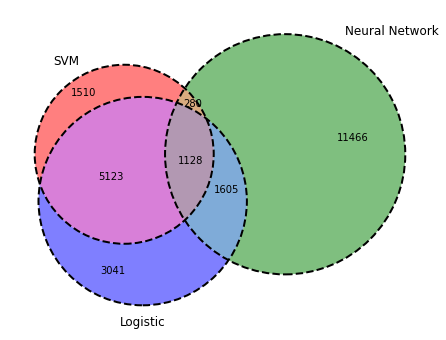

In [ ]:
Ab = M[0].difference(M[1])
Ac = M[0].difference(M[2])
Ba = M[1].difference(M[0])
Bc = M[1].difference(M[2])
Ca = M[2].difference(M[0])

AB = M[0].intersection(M[1])
ABc = AB.difference(M[2])

AC = M[0].intersection(M[2])
ACb = AC.difference(M[1])

BC = M[1].intersection(M[2])
BCa = BC.difference(M[0])

ABC = AB.intersection(M[2])

Abc = Ab.difference(M[2])
Bac = Ba.difference(M[2])
Cab = Ca.difference(M[1])

fig = plt.figure(figsize=(10, 6))
venn3(subsets = (len(Abc), len(Bac), len(ABc), len(Cab), len(ACb), len(BCa), len(ABC)), set_labels = ('SVM', 'Neural Network', 'Logistic'), alpha = 0.5)
venn3_circles(subsets=(len(Abc), len(Bac), len(ABc), len(Cab), len(ACb), len(BCa), len(ABC)), linestyle="dashed", linewidth=2)

from google.colab import files
plt.savefig("venn.pdf", bbox_inches = 'tight')
files.download("venn.pdf")

In [ ]:
from venn import venn


misclassified = {
    
    "NN" : M[0],
    "Logistic": M[1],
    "Decision": M[2],
    "Naive": M[3]
}

venn(misclassified)